In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
results_df = pd.read_csv("./data/survey_final_all_otherMoved.csv", sep=";")
results_df = results_df.ix[results_df["Last page"]==3]
results_df=results_df.fillna('No')
questions = set([c[0:c.index("- ")] for c in results_df.columns if "- " in c])
print np.shape(results_df)
q_stem = []
for q in results_df.columns:
    if any((q.startswith('How'),q.startswith('Which'),q.startswith('What'))):
        if "- [" in q:
            q=q[0:q.index("- [")]
        q_stem.append(q)

q_stem = list(set(q_stem))

(77, 82)


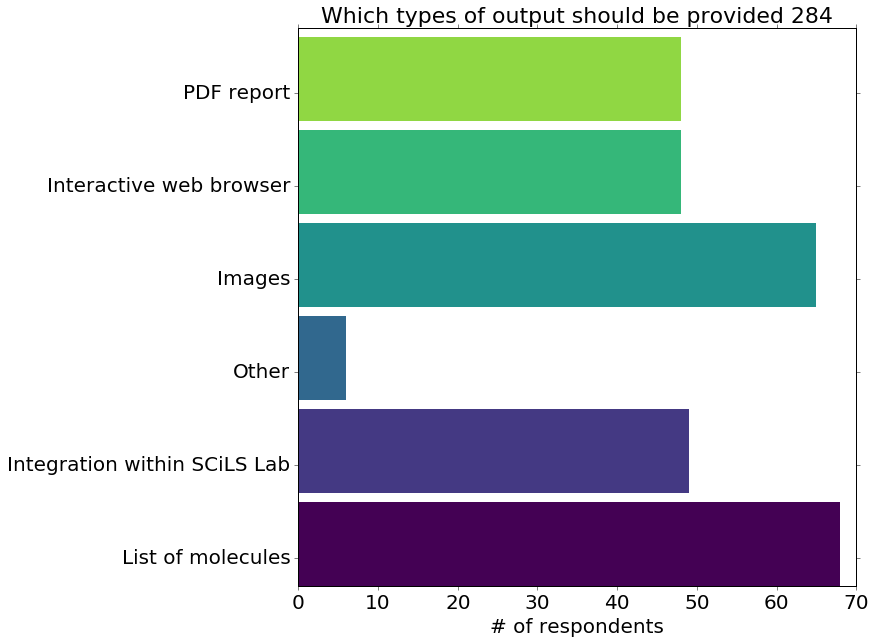

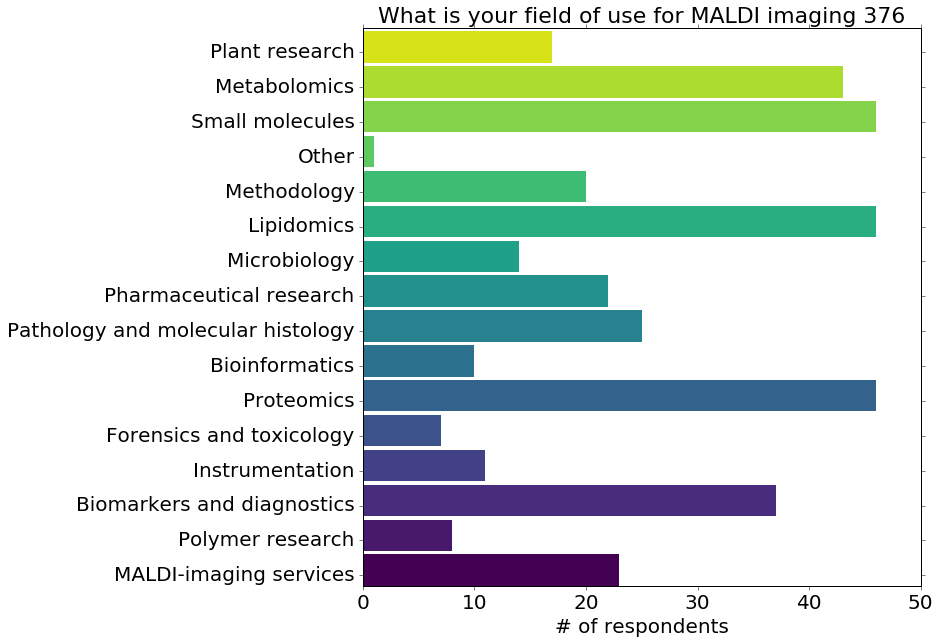

[1, 7, 8, 10, 11, 14, 17, 20, 22, 23, 25, 37, 43, 46, 46, 46]
[7, 8, 10, 11, 14, 17, 20, 22, 23, 25, 37, 43, 46, 46, 46]


In [3]:
text_col = 'black'
cmap=plt.get_cmap('viridis')

multi_q = [ 'Which types of output should be provided', 'What is your field of use for MALDI imaging', 'What is your profession',  'Which types / formats of input data are necessary', 'Which type of mass analyzers do you use in your lab for mass spectrometry imaging', 'What would be the preferable way of running the software', 'Which ionization techniques do you use in your lab for mass spectrometry imaging'] 
for q in multi_q:
    sub_df = results_df[[c for c in results_df.columns if c.startswith(q)]]
    if len(sub_df.columns)==1: #a free text input - skip it
        continue
    vals={}
    if any((q.startswith('Which'),q.startswith("What"))): #yes/no questions
        for c in sub_df.columns:
            _ = sub_df[c].value_counts()
            vals[c[c.index("[")+1:c.index("]")]] = sum([_[this] for this in _.keys() if this != 'No'])
    plt.figure(figsize=(10,10))
    plt.barh(range(len(vals)),vals.values(),height=0.9,linewidth=0,color=[cmap(float(ii)/len(vals)) for ii in range(len(vals))])#
    plt.yticks([v+0.3 for v in range(len(vals))],vals.keys(),va='center',color=text_col,fontsize="20")
    plt.xticks(color=text_col,fontsize="20")
    plt.title("{} {}".format(q,sum(vals.values())),color=text_col,fontsize="22")
    plt.xlabel("# of respondents", color=text_col,fontsize="20")
    ax = plt.gca()
    ax.tick_params(direction='out')
    plt.show()
    if q == 'What is your field of use for MALDI imaging':
        print sorted(vals.values())
        print sorted([46,46,43,46,22,37,25,7,8,17,14,20,10,23,11])
        break

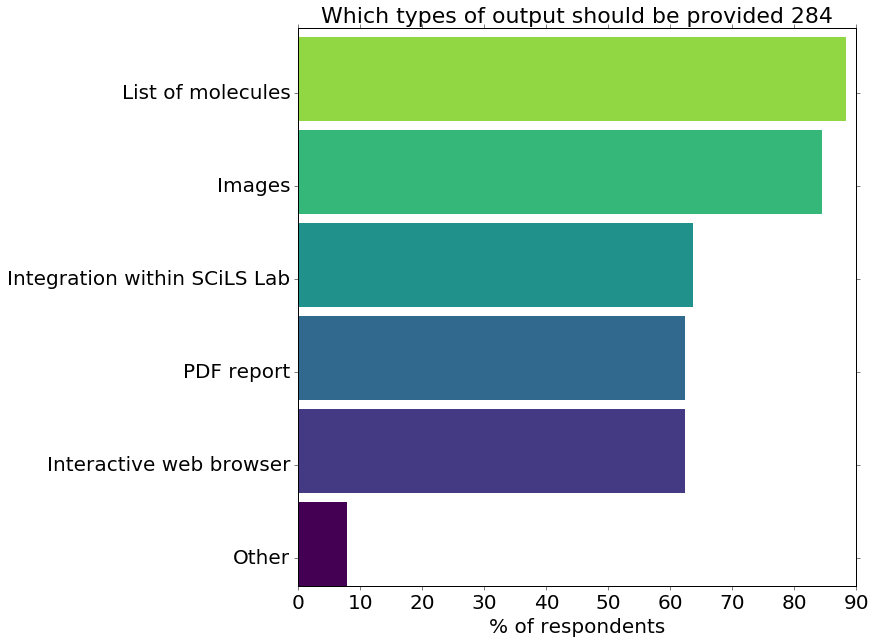

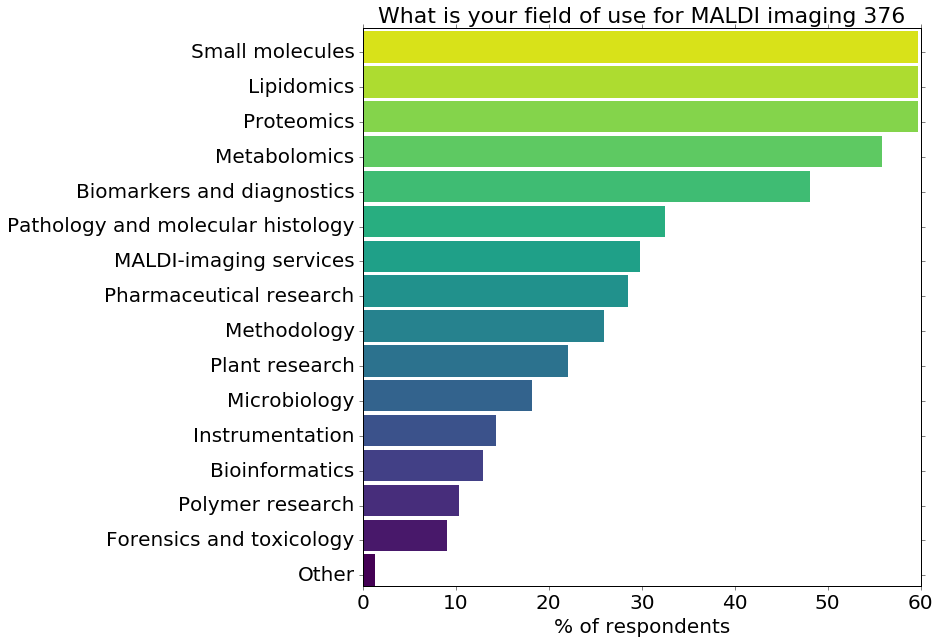

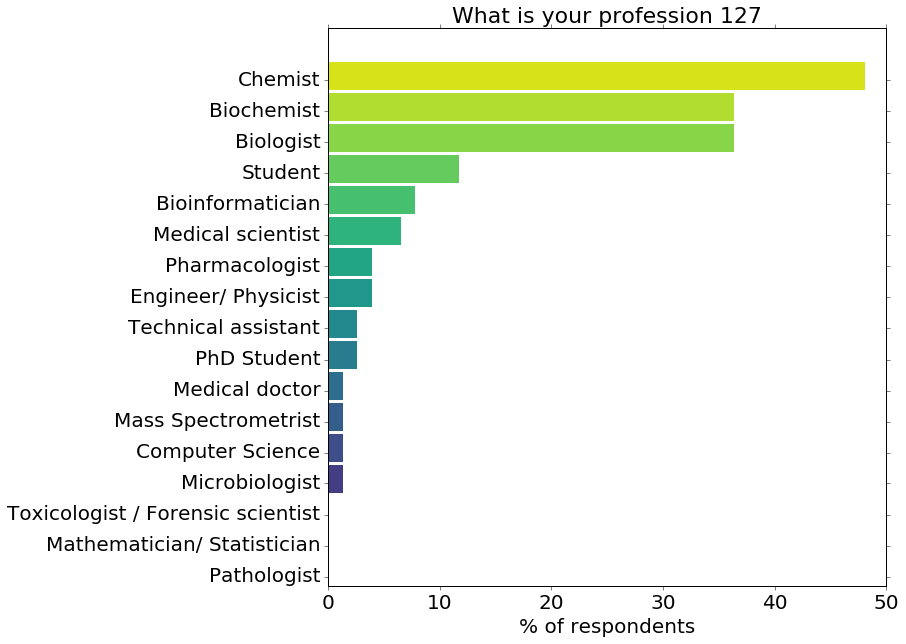

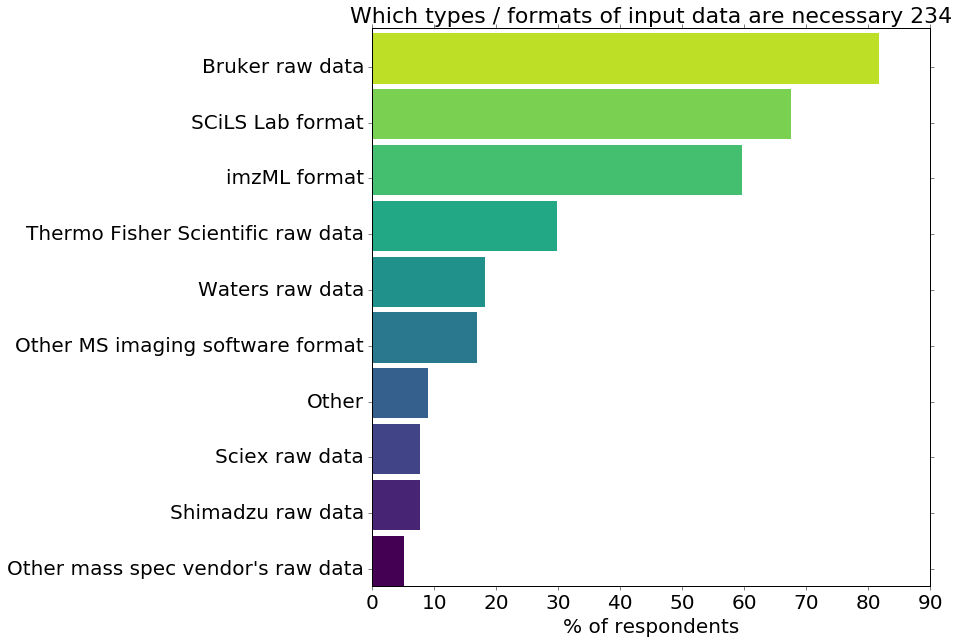

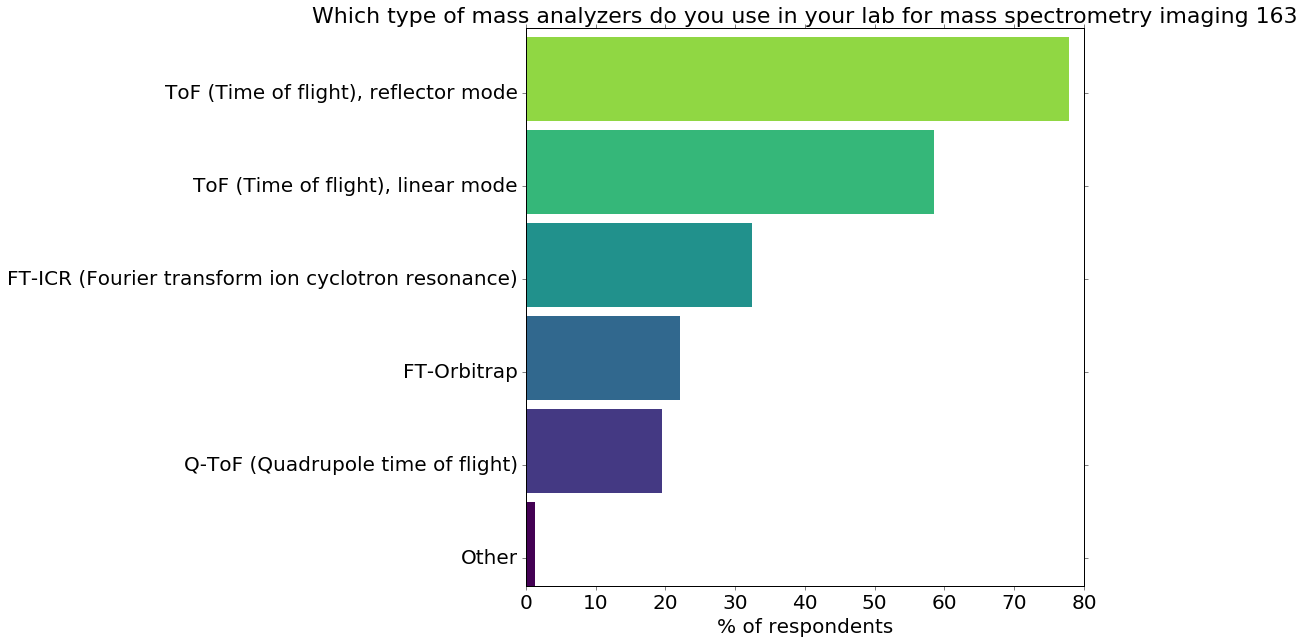

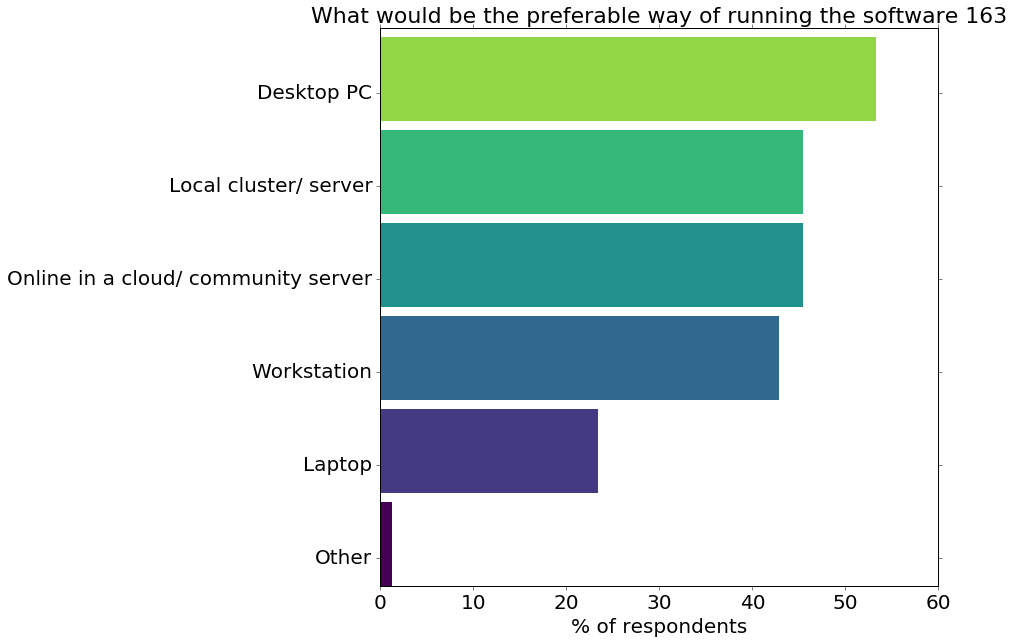

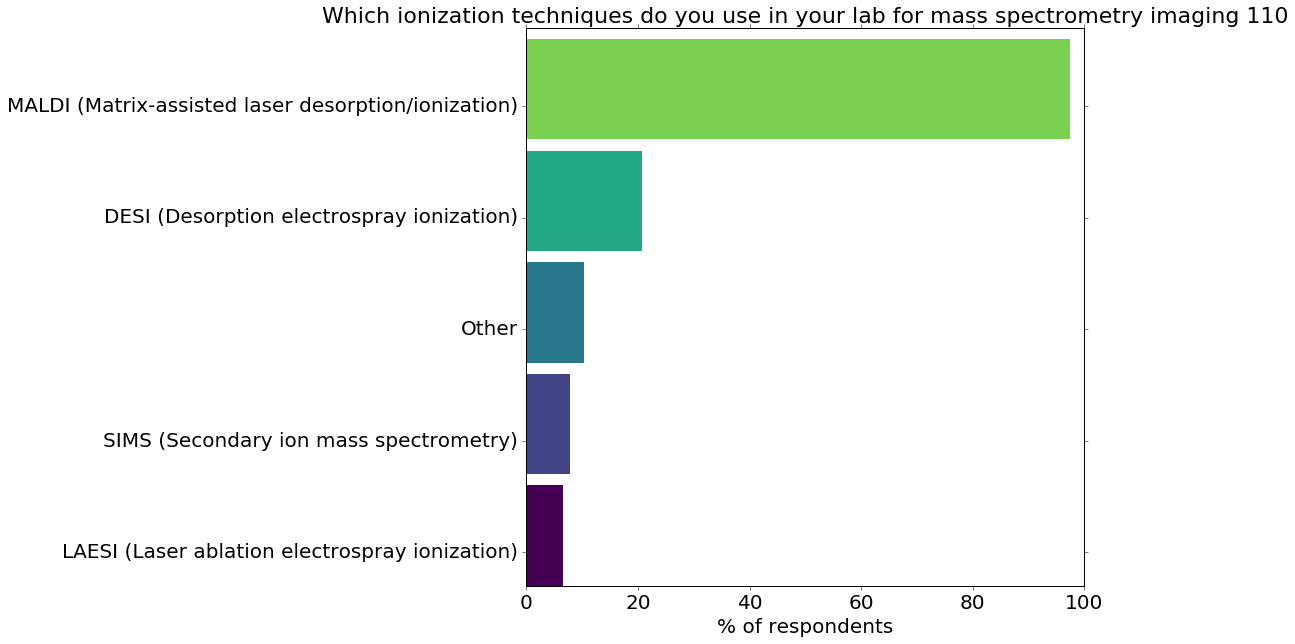

In [4]:
# Multi-column questions
text_col = 'black'
cmap=plt.get_cmap('viridis')

multi_q = [ 'Which types of output should be provided', 'What is your field of use for MALDI imaging', 'What is your profession',  'Which types / formats of input data are necessary', 'Which type of mass analyzers do you use in your lab for mass spectrometry imaging', 'What would be the preferable way of running the software', 'Which ionization techniques do you use in your lab for mass spectrometry imaging'] 
for q in multi_q:
    sub_df = results_df[[c for c in results_df.columns if c.startswith(q)]]
    if len(sub_df.columns)==1: #a free text input - skip it
        continue
    vals={}
    if any((q.startswith('Which'),q.startswith("What"))): #yes/no questions
        for c in sub_df.columns:
            _ = sub_df[c].value_counts()
            vals[c[c.index("[")+1:c.index("]")]] = sum([_[this] for this in _.keys() if this != 'No'])
    plt.figure(figsize=(10,10))
    v_ix = np.argsort(vals.values())
    plt.barh(range(len(vals)),[(100./77.)*vals.values()[v] for v in v_ix],height=0.9,linewidth=0,color=[cmap(float(ii)/len(vals)) for ii in range(len(vals))])#
    plt.yticks([v+0.3 for v in range(len(vals))],[vals.keys()[v] for v in v_ix],va='center',color=text_col,fontsize="20")
    plt.xticks(color=text_col,fontsize="20")
    plt.title("{} {}".format(q,sum(vals.values())),color=text_col,fontsize="22")
    plt.xlabel("% of respondents", color=text_col,fontsize="20")
    ax = plt.gca()
    ax.tick_params(direction='out')
    plt.show()


In [5]:
multi_q = ['What is your field of use for MALDI imaging',] 
#tags = ['Biomarkers and diagnostics','Pharmaceutical research','Lipidomics','Small molecules','Metabolomics']
tags = ['Pharmaceutical research','Lipidomics','Small molecules','Metabolomics']

for q in multi_q:
    sub_df = results_df[[c for c in results_df.columns if c.startswith(q)]]
    vals={}
    print sum([any([row[1][q+"- ["+tag+"]"]=="Yes" for tag in tags]) for row in sub_df.iterrows()])/77.
    

0.792207792208


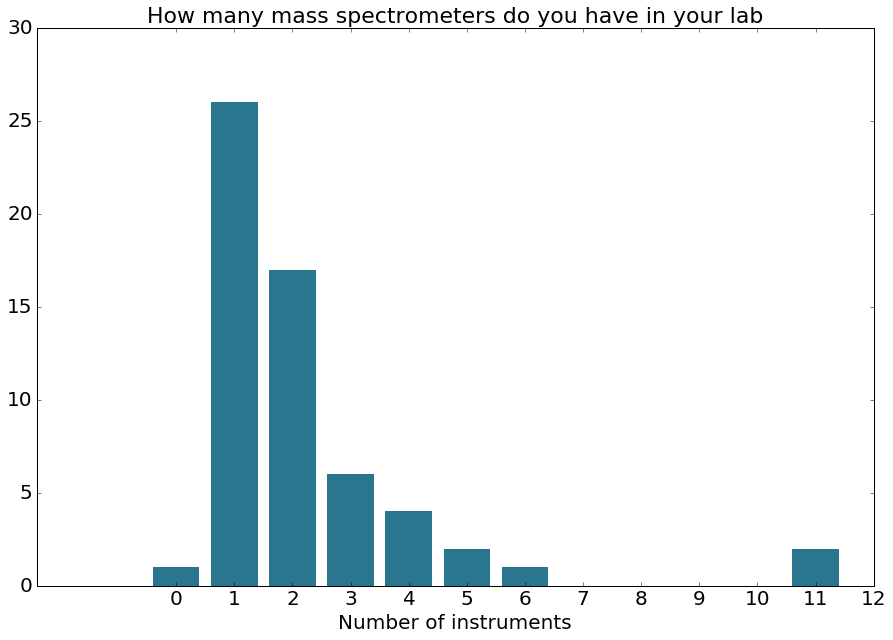

2.0: median number of instruments
(17,): 


In [6]:
single_q = ["How many mass spectrometers do you have in your lab",]
for q in single_q:
    plt.figure(figsize=(15,10))
    sub_df = results_df[[c for c in results_df.columns if c.startswith(q)]]
    bins=[-0.5,]+range(13)
    plt.hist([v[0] for v in sub_df.values if v !='No'], bins=bins, color=cmap(100), width = 0.8, linewidth=0)
    plt.yticks(color=text_col,fontsize="20")
    plt.xticks(np.asarray(bins[1:])+0.4, bins[1:], color=text_col,fontsize="20")
    plt.xlabel('Number of instruments',color=text_col,fontsize="20")
    plt.title("{}".format(q),color=text_col,fontsize="22")
    plt.show()
    print "{}: median number of instruments".format(np.median([v[0] for v in sub_df.values if v !='No']))
    print "{}: ".format(np.shape([v[0] for v in sub_df.values if v ==2]))

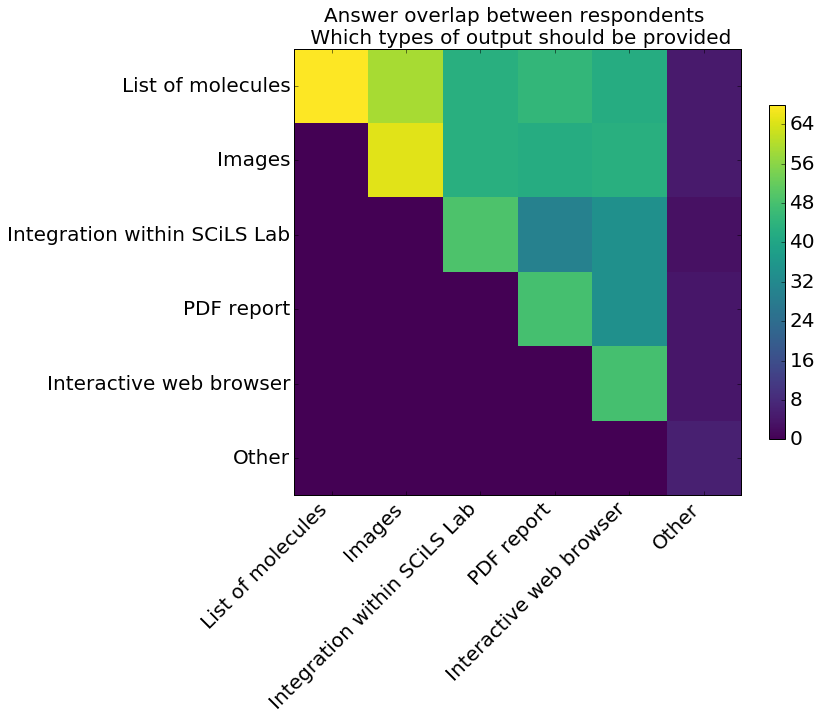

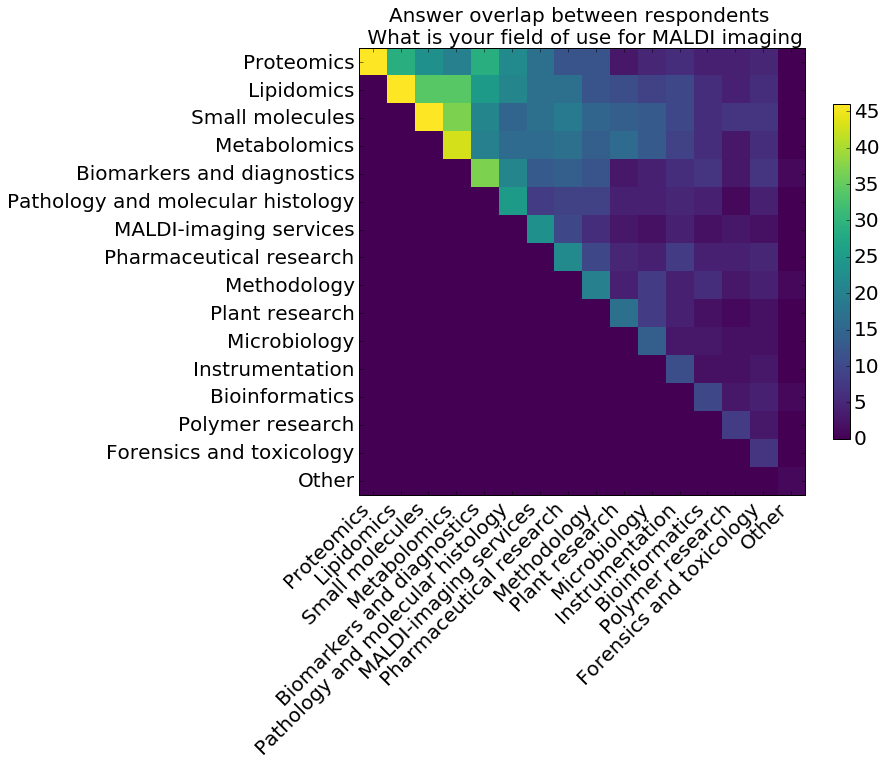

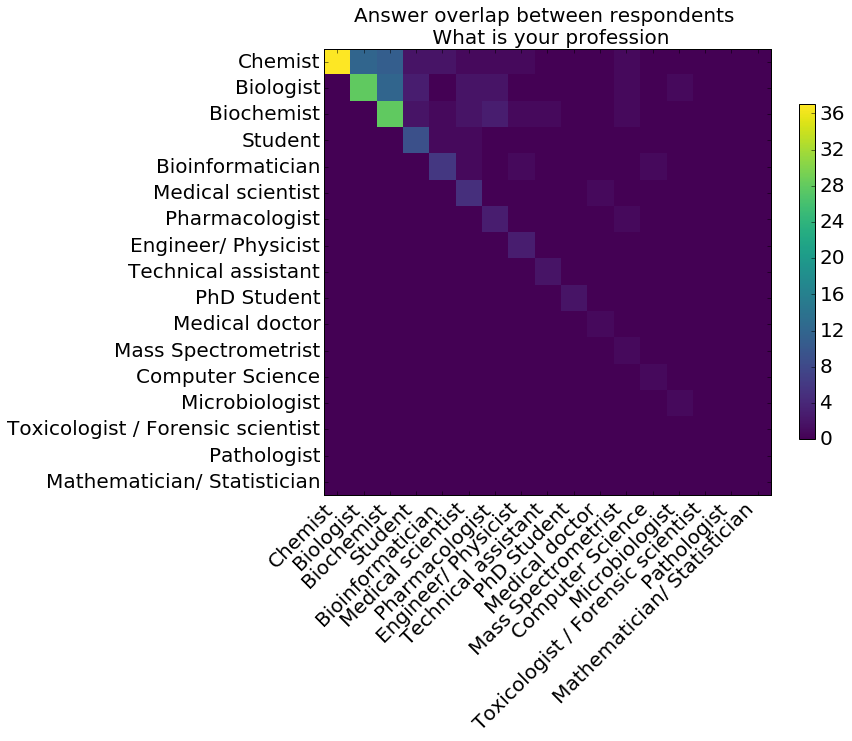

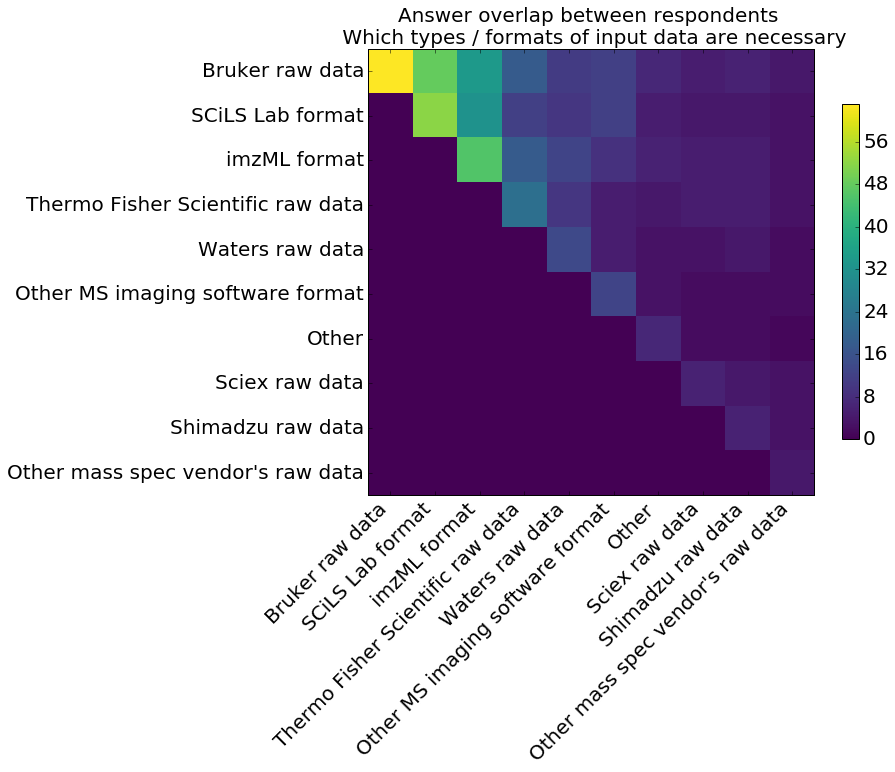

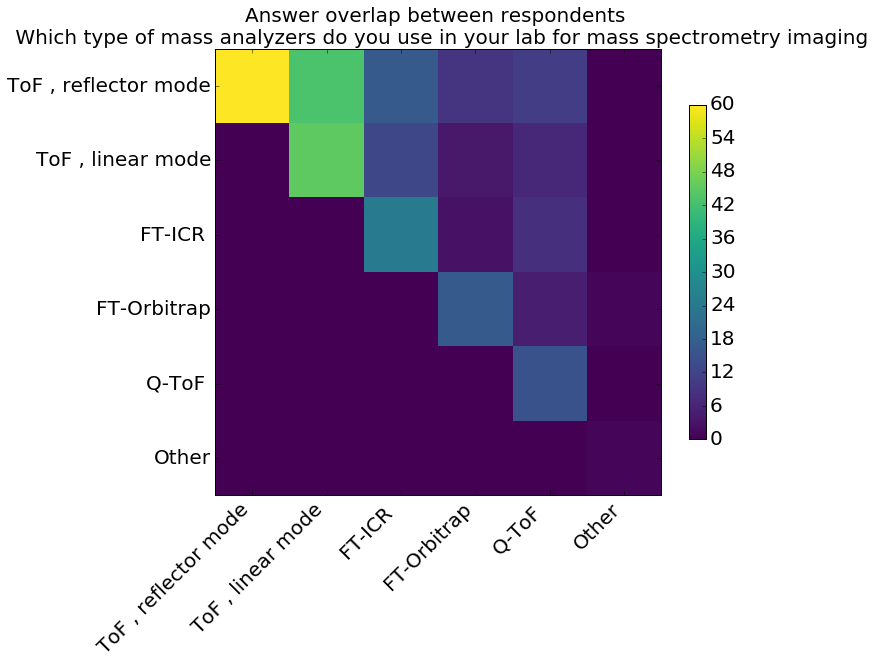

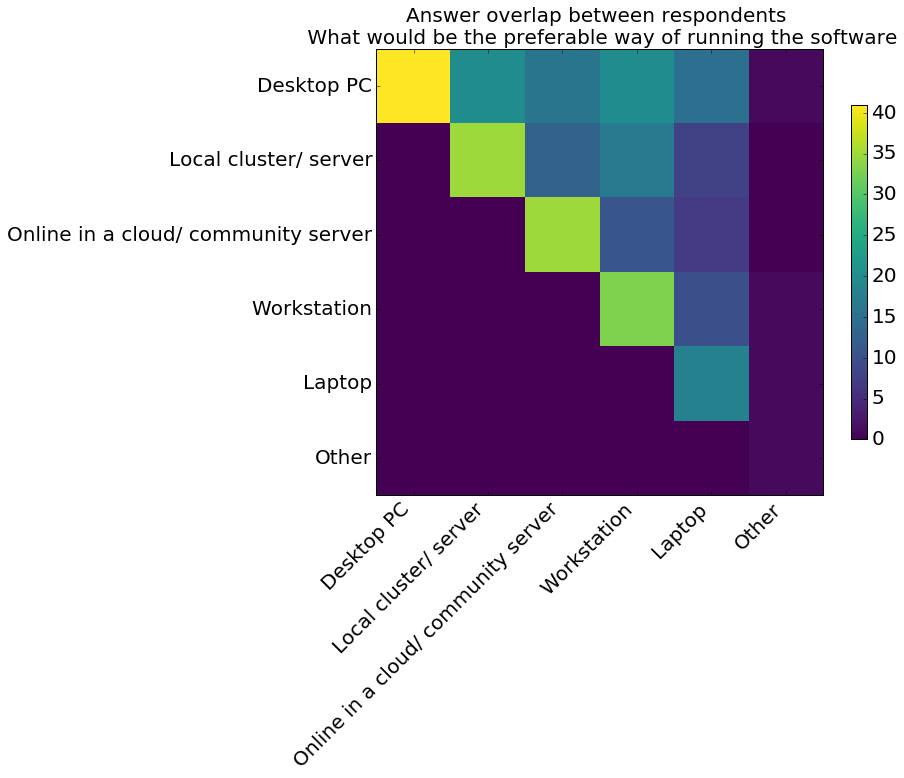

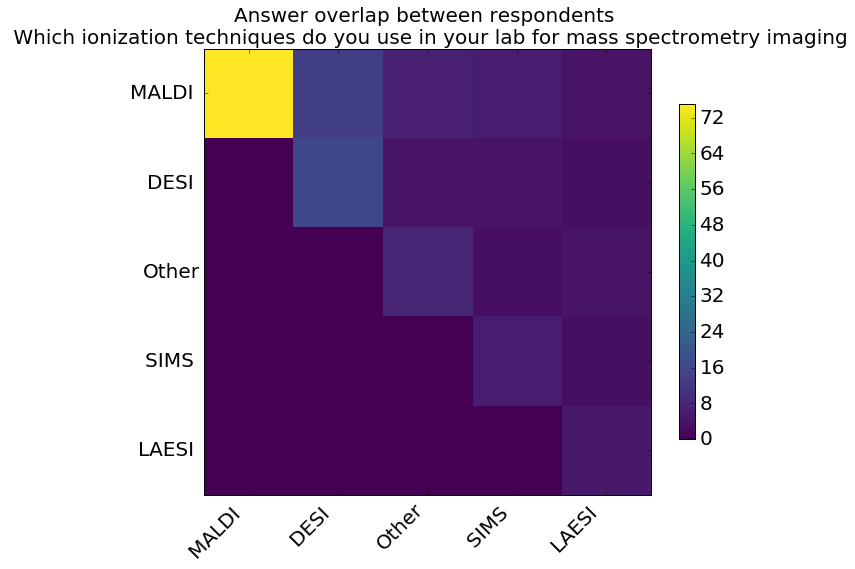

In [7]:
# Some Heat Maps
multi_q = [ 'Which types of output should be provided', 'What is your field of use for MALDI imaging', 'What is your profession',  'Which types / formats of input data are necessary', 'Which type of mass analyzers do you use in your lab for mass spectrometry imaging', 'What would be the preferable way of running the software', 'Which ionization techniques do you use in your lab for mass spectrometry imaging'] 
for q in multi_q:
    sub_df = results_df[[c for c in results_df.columns if c.startswith(q)]]
    n_cols = len(sub_df.columns) 
    if n_cols==1: #a free text input - skip it
        continue
    vals={}
    if any((q.startswith('Which'),q.startswith("What"))): #yes/no questions
        for c in sub_df.columns:
            _ = sub_df[c].value_counts()
            if 'Yes' in _:
                vals[c[c.index("[")+1:c.index("]")]] = _['Yes']
    
    
    diag_idx = np.asarray([sum(sub_df[sub_df.columns[ii]] != 'No') for ii in range(n_cols)]).argsort()[::-1]
    heat = np.zeros((n_cols,n_cols))
    for ii in range(n_cols):
        for jj in range(ii,n_cols):
            vii = sub_df[sub_df.columns[diag_idx[ii]]] != 'No'
            vjj = sub_df[sub_df.columns[diag_idx[jj]]] != 'No'
            heat[ii,jj] = sum(vii & vjj)
    diag=heat[range(n_cols),range(n_cols)]
    #sort by diagonal

    plt.figure(figsize=(10,10))
    plt.imshow(heat, interpolation="nearest",origin='upper', cmap='viridis')
    color_bar = plt.colorbar(shrink=0.6)

    plt.setp(plt.getp(color_bar.ax.axes, 'yticklabels'), color=text_col,fontsize=20)
    labels=[]
    for c in sub_df.columns[diag_idx]:
        if "(" in c:
            c=c[0:c.index("(")]+c[c.index(")")+1:]
        labels.append(c[c.index("[")+1:c.index("]")])
    plt.xticks(range(n_cols), labels,rotation=45,horizontalalignment='right', color=text_col,fontsize=20)
    plt.yticks(range(n_cols),labels, color=text_col,fontsize=20)
    plt.title('Answer overlap between respondents \n {}'.format(q), color=text_col,fontsize=20)
    plt.show()


In [8]:
multi_q = ['Which type of mass analyzers do you use in your lab for mass spectrometry imaging- ', ]
high_res = ['[FT-ICR (Fourier transform ion cyclotron resonance)]','[FT-Orbitrap]','[Q-ToF (Quadrupole time of flight)]',]
low_res = ['[ToF (Time of flight), reflector mode]', '[ToF (Time of flight), linear mode]']
for q in multi_q:
    sub_df = results_df[[c for c in results_df.columns if c.startswith(q)]]
    n_cols = len(sub_df.columns) 
    uses_hr = []
    uses_lr = []
    for entry in sub_df.iterrows():
        uses_hr.append(any([True if entry[1][q+hr] == 'Yes' else False for hr in high_res]))
        uses_lr.append(any([True if entry[1][q+lr] == 'Yes' else False for lr in low_res]))
print "Uses HR: {:1.0f}%".format(100.*sum(uses_hr)/float(len(uses_hr)))
print "Uses LR: {:1.0f}%".format(100.*sum(uses_lr)/float(len(uses_lr)))
    

Uses HR: 55%
Uses LR: 81%


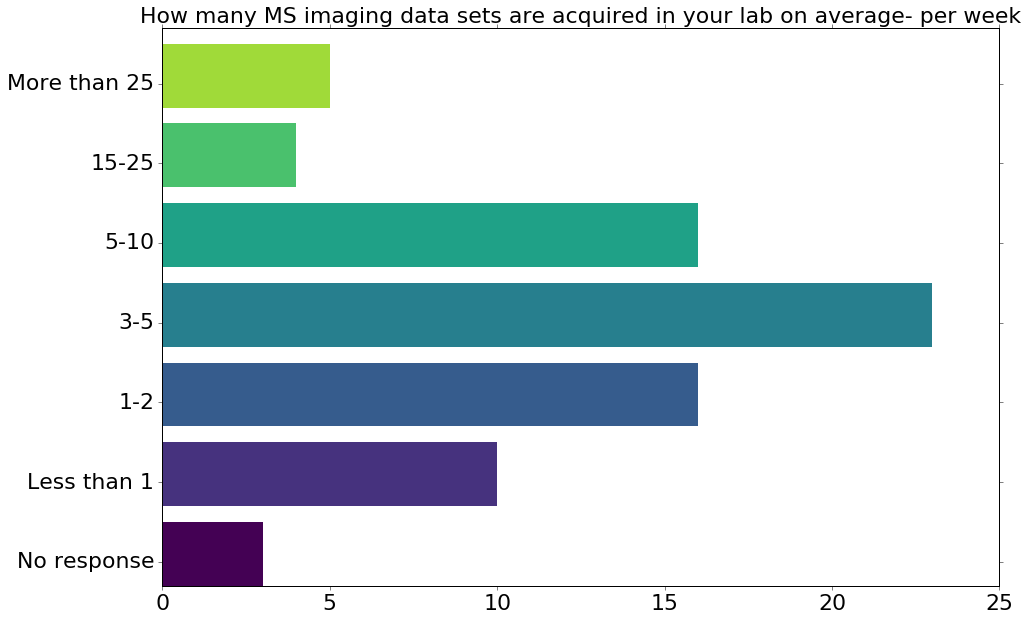

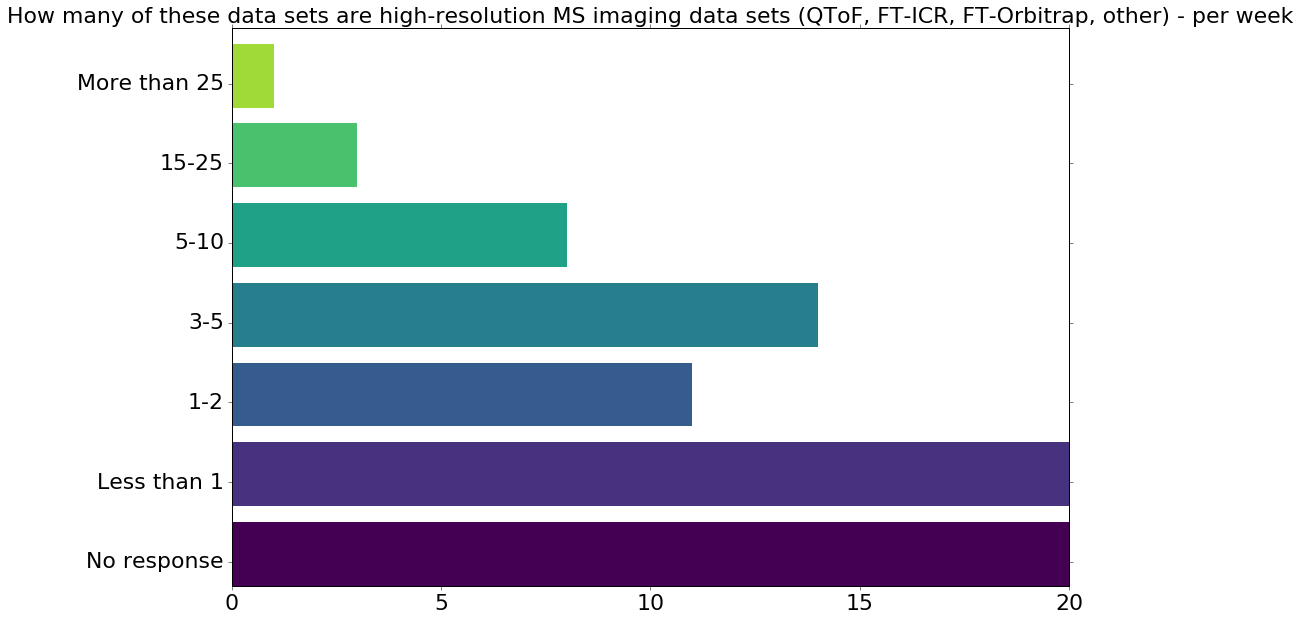

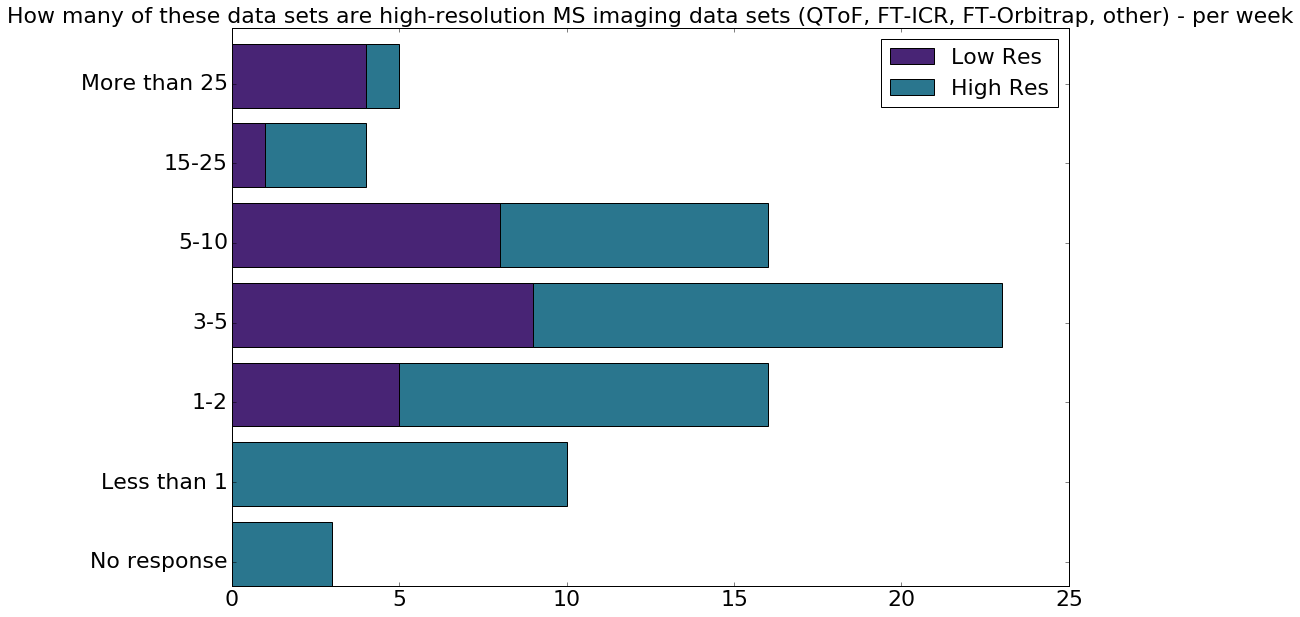

420.0 HR 341.5 LR per week: 4268.3GB 
per year:218468.3GB 213.347949219TB 
5.45 HR 4.44 LR per week: 4200.89GB (per lab)
per year:2837.25GB 2.77TB (per lab)


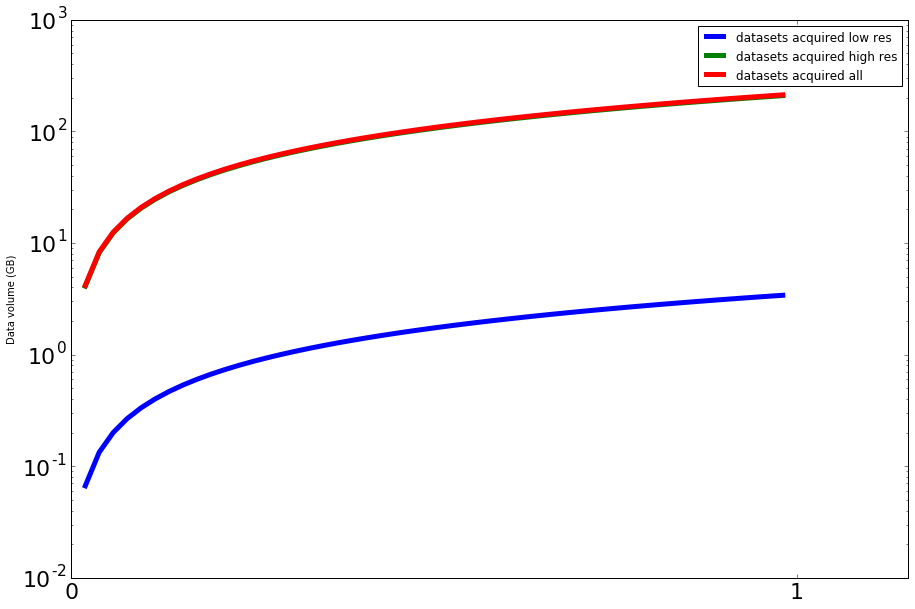

In [9]:
import copy
cmap = plt.get_cmap('viridis')
counting_q = list(['How many MS imaging data sets are acquired in your lab on average-', 'How many of these data sets are high-resolution MS imaging data sets (QToF, FT-ICR, FT-Orbitrap, other) -'])
day_to_week = {"3-5 data sets / week":["3-5",4.],
               "1-2 data sets / week":["1-2",1.5],
               "1-2 data sets / day":["5-10",7.5],
               "Less than 1 data set / week" : ["Less than 1",0.],
               "More than 5 data sets / day" : ["More than 25",25],
               "3-5 data sets / day": ["15-25", 17.5],
               'No' : ["No response",-100.],
              }
for q in counting_q:
    sub_df = results_df[q]
    vals = sub_df.value_counts()
    plt.figure(figsize=(15,10))
    v_ix = np.argsort([day_to_week[val][1] for val in vals.keys()])
    labels = [day_to_week[val][0] for val in vals.keys()[v_ix]]
    plt.barh(range(len(vals)),[vals.values[v] for v in v_ix],linewidth=0,color=[cmap(float(ii)/len(vals)) for ii in range(len(vals))])#
    plt.yticks([v+0.3 for v in range(len(vals))],labels,va='center',color="black",fontsize=22)
    plt.xticks(color="black",fontsize=22)
    plt.title("{} per week".format(q,),color=text_col,fontsize=22)
    ax = plt.gca()
    ax.tick_params(direction='out')
    plt.show()
    
bins = sorted([day_to_week[key][1] for key in day_to_week.keys()]+[26,])
datasets = [[],[]]
datasets[0] = [day_to_week[val][1] for val in results_df[counting_q[0]]]
datasets[1] = [day_to_week[val][1] for val in results_df[counting_q[1]]]

plt.figure(figsize=(15,10))
h_all = np.histogram(datasets[0], bins=bins)
h_HR = np.histogram(datasets[1], bins=bins)
plt.barh(range(len(h_all[0])),[_h0-_h1 for _h0,_h1 in zip(h_all[0], h_HR[0])], color=cmap(25), label='Low Res')
plt.barh(range(len(h_all[0])),h_HR[0],  color=cmap(100), left=[_h0-_h1 for _h0,_h1 in zip(h_all[0], h_HR[0])], label='High Res')
plt.legend(fontsize=22)
plt.yticks([v+0.3 for v in range(len(vals))],labels,va='center',color="black",fontsize=22)
plt.xticks(color="black",fontsize=22)
plt.title("{} per week".format(q,),color=text_col,fontsize=22)
plt.xlim(0,25)
plt.show()


hr_datasets_per_week = sum([n_week*n_labs for n_week,n_labs in zip(h_HR[0],h_HR[1][1:])])
lr_datasets_per_week = sum([n_week*n_labs for n_week,n_labs in zip(h_all[0],h_all[1][1:])])-hr_datasets_per_week
high_res_fsize = 10 #GB per dataset
low_res_fsize = 0.2 #GB per dataset
n_labs = len(sub_df)
print "{} HR {} LR per week: {}GB ".format(hr_datasets_per_week, lr_datasets_per_week, hr_datasets_per_week*high_res_fsize+lr_datasets_per_week*low_res_fsize)
print "per year:{}GB {}TB ".format(52*hr_datasets_per_week*high_res_fsize+lr_datasets_per_week*low_res_fsize,(52*hr_datasets_per_week*high_res_fsize+lr_datasets_per_week*low_res_fsize)/1024)
print "{:3.2f} HR {:3.2f} LR per week: {:3.2f}GB (per lab)".format(hr_datasets_per_week/n_labs, lr_datasets_per_week/n_labs, hr_datasets_per_week*high_res_fsize+lr_datasets_per_week*low_res_fsize/n_labs)
print "per year:{:3.2f}GB {:3.2f}TB (per lab)".format(52*hr_datasets_per_week*high_res_fsize/n_labs+lr_datasets_per_week*low_res_fsize/n_labs,(52*hr_datasets_per_week*high_res_fsize+lr_datasets_per_week*low_res_fsize)/1024/n_labs)

plt.figure(figsize=(15,10))
plt.plot(range(1,52),[low_res_fsize*r*lr_datasets_per_week/1024 for r in range(1,52)], label='datasets acquired low res', linewidth=5)
plt.plot(range(1,52),[high_res_fsize*r*hr_datasets_per_week/1024 for r in range(1,52)], label='datasets acquired high res', linewidth=5)
plt.plot(range(1,52),[low_res_fsize*r*lr_datasets_per_week/1024+high_res_fsize*r*hr_datasets_per_week/1024 for r in range(1,52)], label='datasets acquired all ', linewidth=5)
plt.xticks([0,52],[0,1],color=text_col,fontsize=22)
plt.yticks(color=text_col,fontsize=22)
plt.yscale('log')
plt.ylabel('Data volume (GB)')
plt.legend()
plt.show()

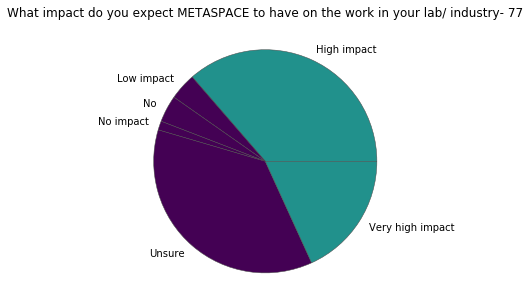

Unsure              28
High impact         28
Very high impact    14
No                   3
Low impact           3
No impact            1
Name: What impact do you expect METASPACE to have on the work in your lab/ industry-, dtype: int64


In [10]:
cmap = plt.get_cmap('viridis')
pie_worthy_qs = ["What impact do you expect METASPACE to have on the work in your lab/ industry-",]
for q in pie_worthy_qs:
    sub_df = results_df[q]
    vals = sub_df.value_counts()
    plt.figure(figsize=(5,5))
    plt.pie([vals[v] for v in sorted(vals.index)],wedgeprops = {'linewidth' : 0.5, "edgecolor":[0.3,0.3,0.3] },textprops={'color':text_col,'fontsize':30} ,labels=sorted(vals.index),colors=[cmap(0.5),cmap(0.),cmap(0.),cmap(0.),cmap(0.)])
    plt.title("{} {}".format(q,sum(vals.values)),color='black',)
    plt.show()
print vals

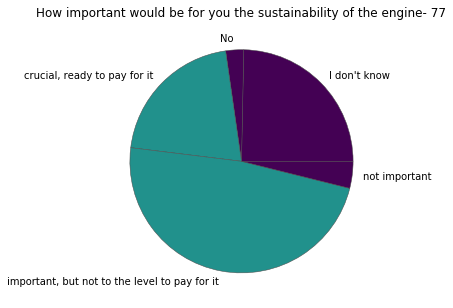

important, but not to the level to pay for it    37
I don't know                                     19
crucial, ready to pay for it                     16
not important                                     3
No                                                2
Name: How important would be for you the sustainability of the engine-, dtype: int64


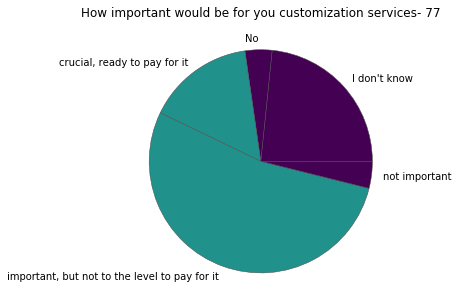

important, but not to the level to pay for it    41
I don't know                                     18
crucial, ready to pay for it                     12
not important                                     3
No                                                3
Name: How important would be for you customization services-, dtype: int64


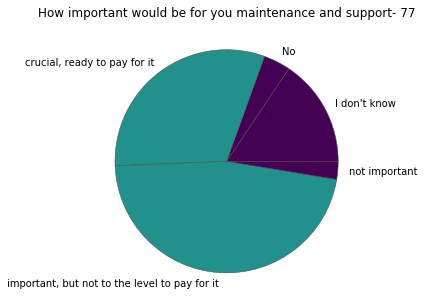

important, but not to the level to pay for it    36
crucial, ready to pay for it                     24
I don't know                                     12
No                                                3
not important                                     2
Name: How important would be for you maintenance and support-, dtype: int64


In [11]:
pie_worthy_qs = ["How important would be for you the sustainability of the engine-","How important would be for you customization services-","How important would be for you maintenance and support-"]
cmap=plt.get_cmap('viridis')
for q in pie_worthy_qs:
    sub_df = results_df[q]
    vals = sub_df.value_counts()
    plt.figure(figsize=(5,5))
    plt.pie([vals[v] for v in sorted(vals.index)],wedgeprops = {'linewidth' : 0.5, "edgecolor":[0.3,0.3,0.3] },textprops={'color':'black','fontsize':30} ,labels=sorted(vals.index),colors=[cmap(0.),cmap(0.),cmap(0.5),cmap(0.5),cmap(0.)])
    plt.title("{} {}".format(q,sum(vals.values)),color='black',)
    plt.show()
    print vals

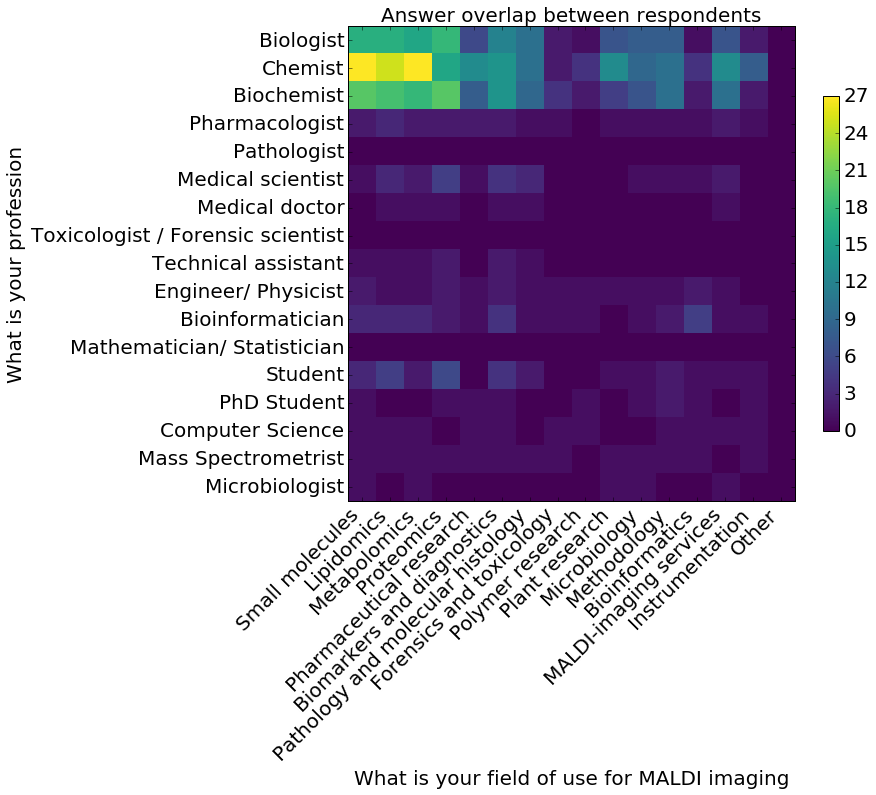

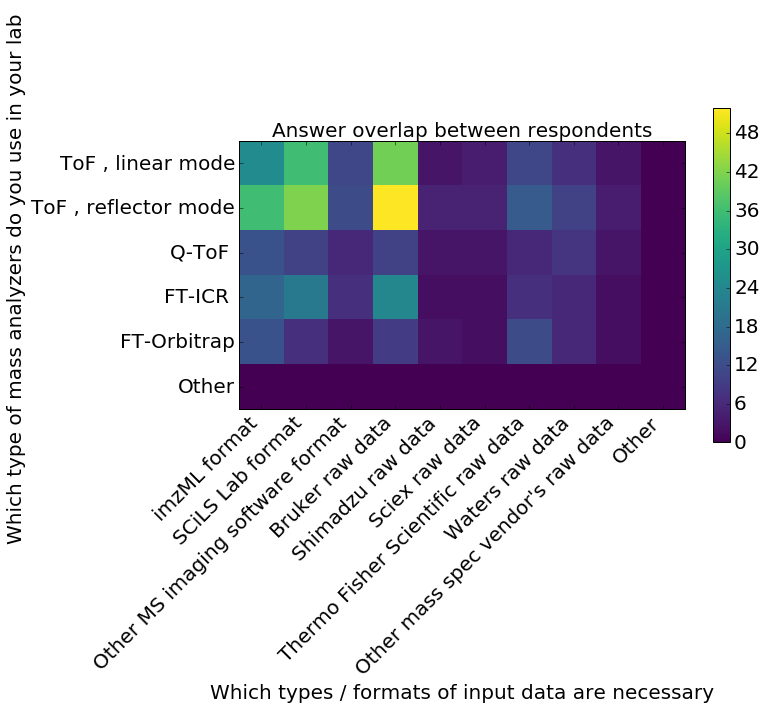

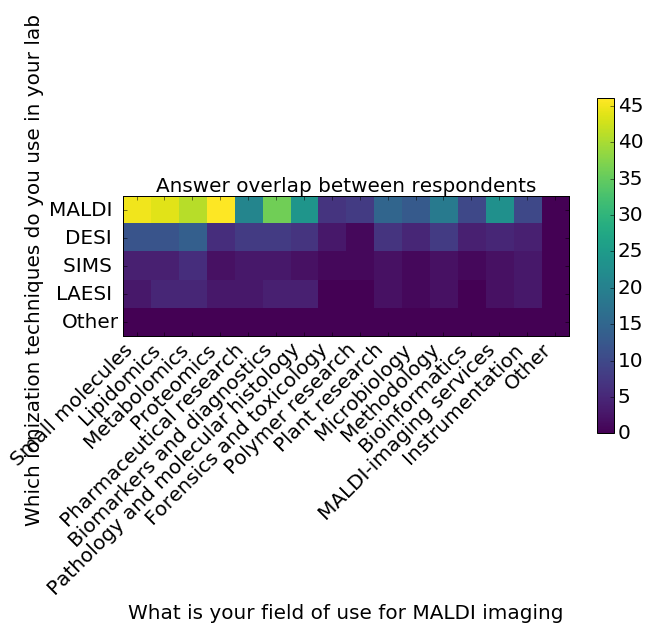

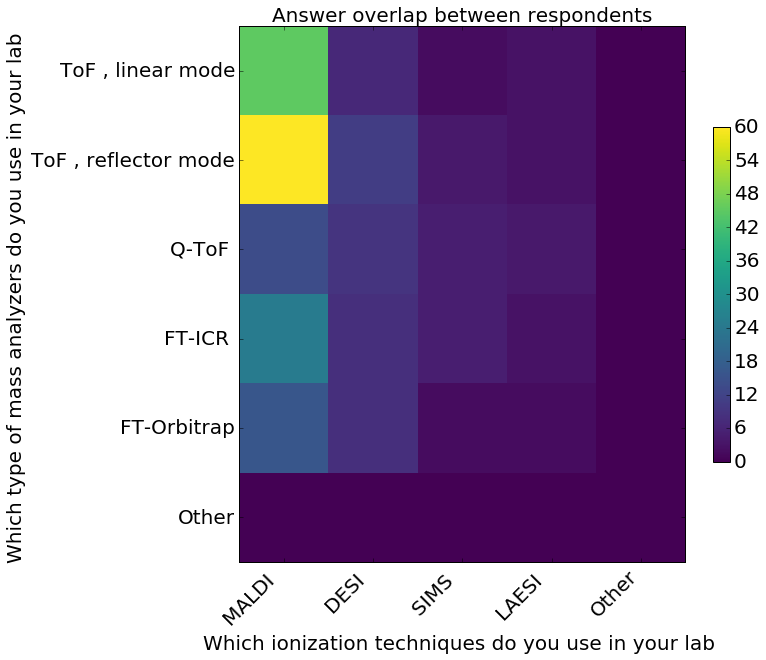

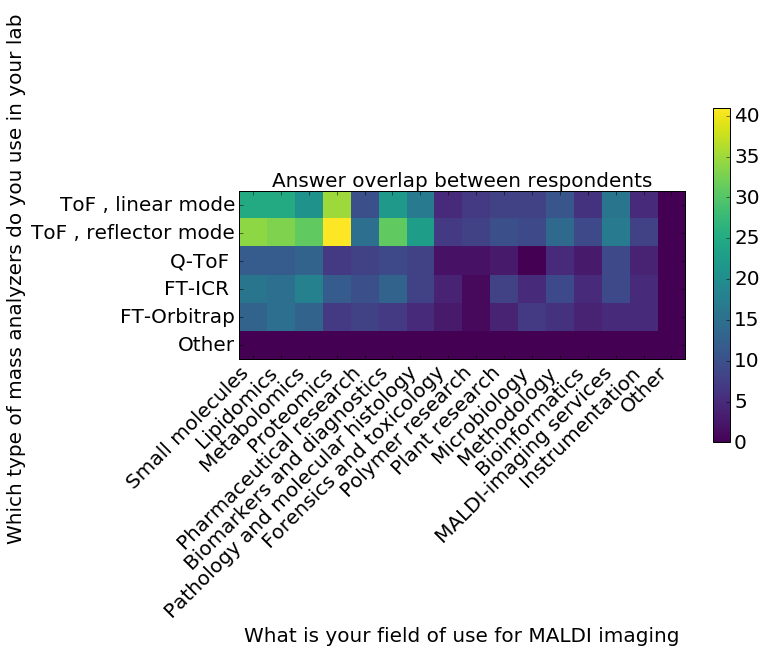

In [12]:
# Intra-respodent replies
multi_q = [['What is your field of use for MALDI imaging', 'What is your profession'],
           ['Which types / formats of input data are necessary', 'Which type of mass analyzers do you use in your lab for mass spectrometry imaging'],
           ['What is your field of use for MALDI imaging', 'Which ionization techniques do you use in your lab for mass spectrometry imaging'],
           ['Which ionization techniques do you use in your lab for mass spectrometry imaging','Which type of mass analyzers do you use in your lab for mass spectrometry imaging'],
           ['What is your field of use for MALDI imaging', 'Which type of mass analyzers do you use in your lab for mass spectrometry imaging'],
        ]
for (q1,q2) in multi_q:
    sub_df1 = results_df[[c for c in results_df.columns if c.startswith(q1)]]
    sub_df2 = results_df[[c for c in results_df.columns if c.startswith(q2)]]
    n_cols = len(sub_df1.columns) 
    n_rows = len(sub_df2.columns)
    if any((n_cols==1, n_rows==1)): #a free text input - skip it
        continue
    heat = np.zeros((n_rows,n_cols))
    for ii,r in enumerate(sub_df1):
        for jj,c in enumerate(sub_df2):
            heat[jj,ii] = np.sum((results_df[r].values=='Yes') & (results_df[c].values=='Yes'))
    #sort by diagonal

    plt.figure(figsize=(10,10))
    plt.imshow(heat, interpolation="nearest",origin='upper', cmap='viridis')
    color_bar = plt.colorbar(shrink=0.6)

    plt.setp(plt.getp(color_bar.ax.axes, 'yticklabels'), color=text_col,fontsize=20)
    labels1=[]
    labels2=[]
    for c in sub_df1.columns:
        if "(" in c:
            c=c[0:c.index("(")]+c[c.index(")")+1:]
        labels1.append(c[c.index("[")+1:c.index("]")])
    for c in sub_df2.columns:
        if "(" in c:
            c=c[0:c.index("(")]+c[c.index(")")+1:]
        labels2.append(c[c.index("[")+1:c.index("]")])
    plt.xticks(range(n_cols), labels1,rotation=45,horizontalalignment='right', color=text_col,fontsize=20)
    plt.yticks(range(n_rows), labels2, color=text_col,fontsize=20)
    if q1.endswith('for mass spectrometry imaging'):
        q1=q1[0:q1.index('for mass spectrometry imaging')]
    if q2.endswith('for mass spectrometry imaging'):
        q2=q2[0:q2.index('for mass spectrometry imaging')]
    plt.xlabel(q1,color=text_col,fontsize=20)
    plt.ylabel(q2,color=text_col,fontsize=20)
    plt.title('Answer overlap between respondents'.format(), color=text_col,fontsize=20)
    plt.show()


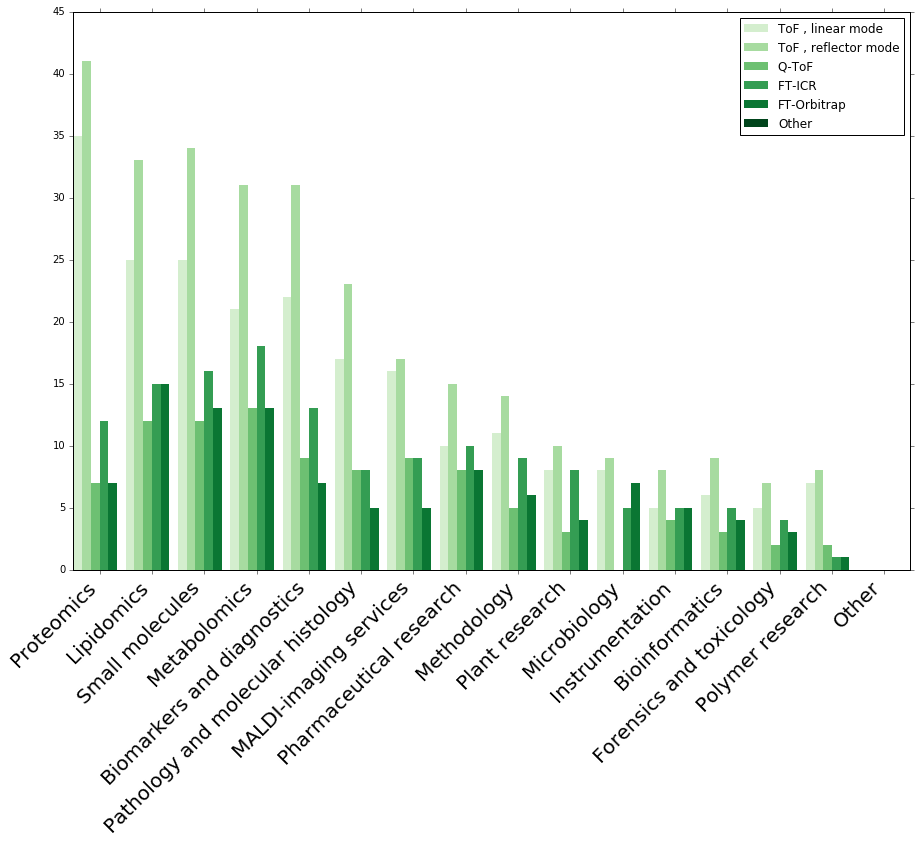

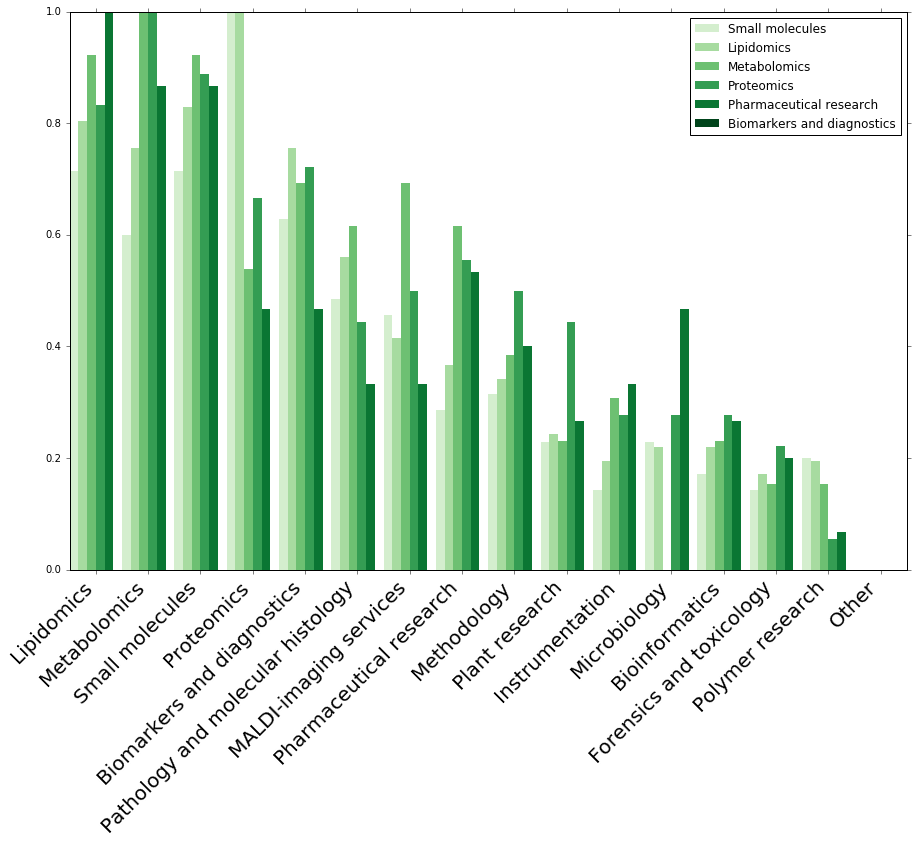

In [13]:
cmap=plt.get_cmap('Greens')
plt.figure(figsize=(15,10))
n_vect = np.nan_to_num(np.max(heat, axis=1))
heat_n = heat#/n_vect[:,None]
v_order = np.argsort(np.sum(np.nan_to_num(heat_n), axis=0))
for ii in range(6):
    plt.bar([r+ii*(1./6) for r in range(16)], [heat_n[ii,v] for v in reversed(v_order)], width=1./6, color=cmap(50+205*ii/5), linewidth=0)
plt.xticks([r+0.5 for r in range(len(v_order))], [labels1[v] for v in reversed(v_order)], rotation=45, ha='right', color=text_col,fontsize=20)
plt.legend(labels2)
ax = plt.gca()
ax.tick_params(direction='out')
plt.show()

cmap=plt.get_cmap('Greens')
plt.figure(figsize=(15,10))
n_vect = np.nan_to_num(np.max(heat, axis=1))
heat_n = heat/n_vect[:,None]
v_order = np.argsort(np.sum(np.nan_to_num(heat_n), axis=0))
for ii in range(6):
    plt.bar([r+ii*(1./6) for r in range(16)], [heat_n[ii,v] for v in reversed(v_order)], width=1./6, color=cmap(50+205*ii/5), linewidth=0)
plt.xticks([r+0.5 for r in range(len(v_order))], [labels1[v] for v in reversed(v_order)], rotation=45, ha='right', color=text_col,fontsize=20)
plt.legend(labels1)
ax = plt.gca()
ax.tick_params(direction='out')
plt.show()

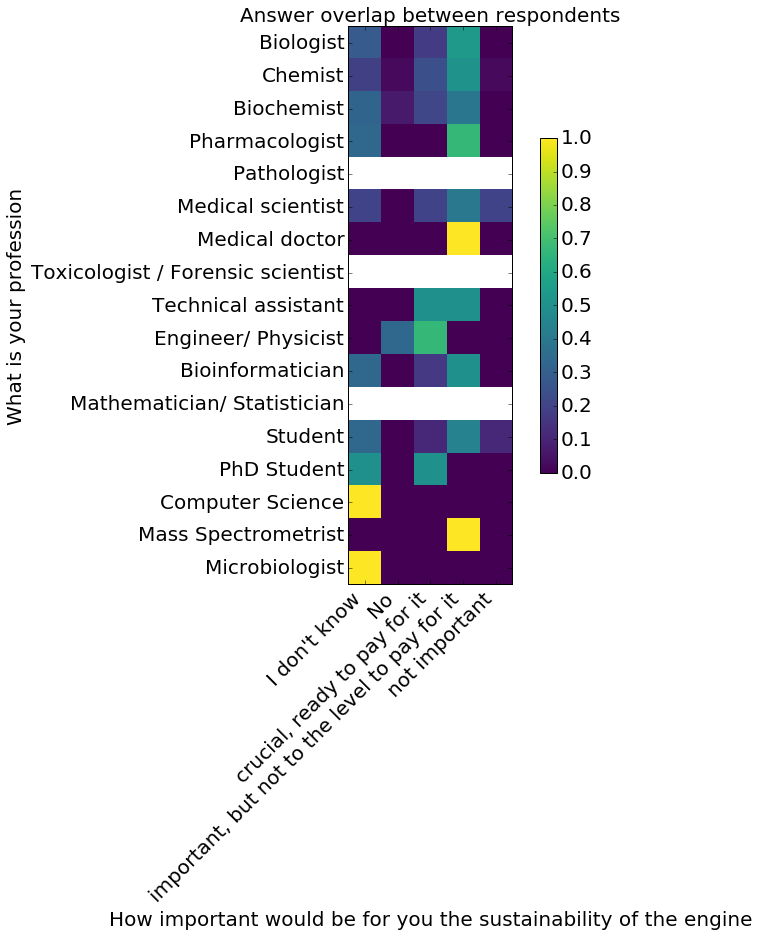

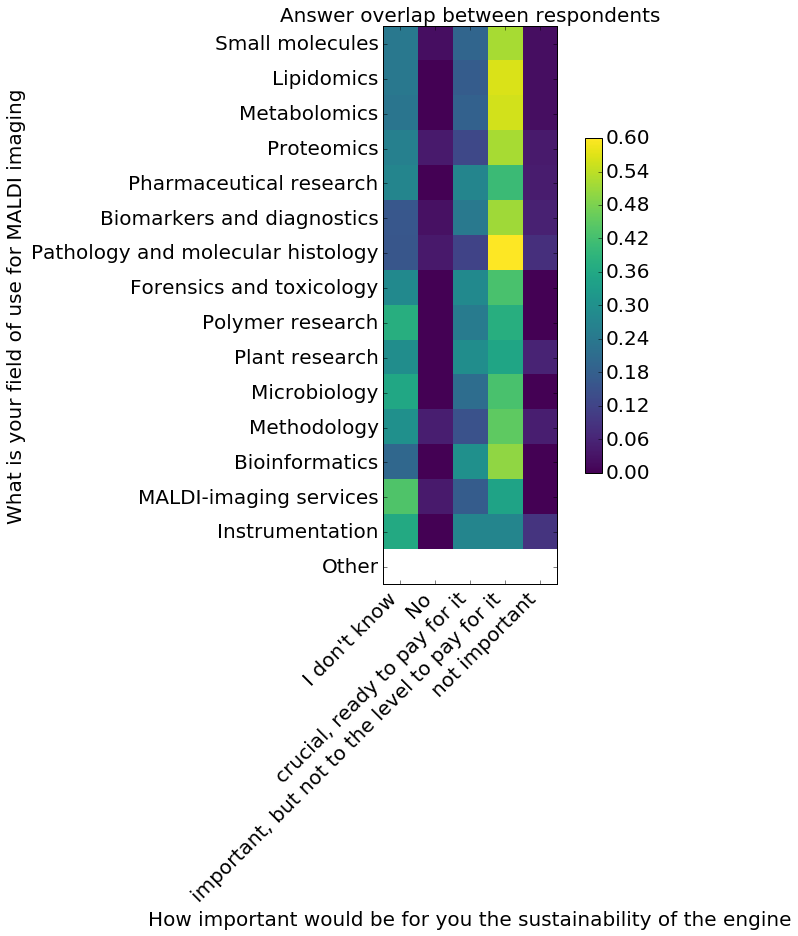

In [14]:
def list_to_matrix(df):
    # convert a list of categories into a matrix with n_category columns
    categories = np.unique(df.values)
    n_categories = len(categories)
    df = pd.DataFrame(np.asarray([np.asarray([v[0] for v in df.values]) == cat for cat in categories]).T, columns=categories)
    df = df.replace(True, "Yes")
    return df

import copy
multi_q = [["How important would be for you the sustainability of the engine", 'What is your profession'],
           ["How important would be for you the sustainability of the engine",'What is your field of use for MALDI imaging'],
        ]
for (q1,q2) in multi_q:
    sub_df1 = copy.copy(results_df[[c for c in results_df.columns if c.startswith(q1)]])
    sub_df2 = copy.copy(results_df[[c for c in results_df.columns if c.startswith(q2)]])
    n_cols = len(sub_df1.columns) 
    n_rows = len(sub_df2.columns)

    if n_cols==1:
        sub_df1 = list_to_matrix(sub_df1)
    if n_rows==1: #a free text input - skip it
        sub_df2 = list_to_matrix(sub_df2)
    n_cols = len(sub_df1.columns) 
    n_rows = len(sub_df2.columns)    
    #print sub_df1
    #print sub_df2
    heat = np.zeros((n_rows,n_cols))
    for ii,r in enumerate(sub_df1):
        for jj,c in enumerate(sub_df2):
            heat[jj,ii] = np.sum((sub_df1[r].values=="Yes") & (sub_df2[c].values=='Yes'))
    n_vect = np.sum(heat,axis=1)
    heat = heat/n_vect[:,None]
    
    plt.figure(figsize=(10,10))
    plt.imshow(heat, interpolation="nearest",origin='upper', cmap='viridis')
    color_bar = plt.colorbar(shrink=0.6)
    plt.setp(plt.getp(color_bar.ax.axes, 'yticklabels'), color=text_col,fontsize=20)
    labels1=[]
    labels2=[]
    for c in sub_df1.columns:
        if "(" in c:
            c=c[0:c.index("(")]+c[c.index(")")+1:]
        if "[" in c:
            c=c[c.index("[")+1:c.index("]")]
        labels1.append(c)
    for c in sub_df2.columns:
        if "(" in c:
            c=c[0:c.index("(")]+c[c.index(")")+1:]
        if "[" in c:
            c=c[c.index("[")+1:c.index("]")]
        labels2.append(c)
    plt.xticks(range(n_cols), labels1,rotation=45,horizontalalignment='right', color=text_col,fontsize=20)
    plt.yticks(range(n_rows), labels2, color=text_col,fontsize=20)
    if q1.endswith('for mass spectrometry imaging'):
        q1=q1[0:q1.index('for mass spectrometry imaging')]
    if q2.endswith('for mass spectrometry imaging'):
        q2=q2[0:q2.index('for mass spectrometry imaging')]
    plt.xlabel(q1,color=text_col,fontsize=20)
    plt.ylabel(q2,color=text_col,fontsize=20)
    plt.title('Answer overlap between respondents'.format(), color=text_col,fontsize=20)
    plt.show()
